<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/3.b.Unsupervised_K_Means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
colnames=['sl', 'sw', 'pl', 'pw', 'cat']
df = pd.read_csv("/content/drive/MyDrive/csv/iris.csv", names=colnames, header=None)
df.head()

,sl,sw,pl,pw,cat
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'Pedal Length')

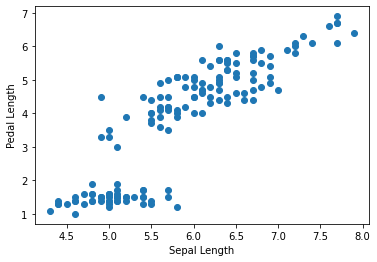

In [17]:
type(df.sl)

plt.scatter(df.sl,df.pl)
plt.xlabel('Sepal Length')
plt.ylabel('Pedal Length')

In [29]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['sl', 'pl']])
y_predicted
df['cluster']=y_predicted

In [30]:
df.head()

,sl,sw,pl,pw,cat,pred,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [31]:

km.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

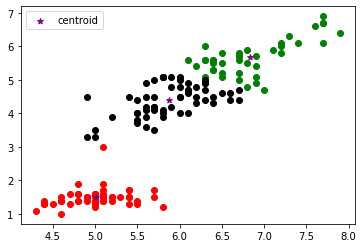

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sl,df1.pl,color='green')
plt.scatter(df2.sl,df2.pl,color='red')
plt.scatter(df3.sl,df3.pl, color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [34]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sl','pl']])
    sse.append(km.inertia_)

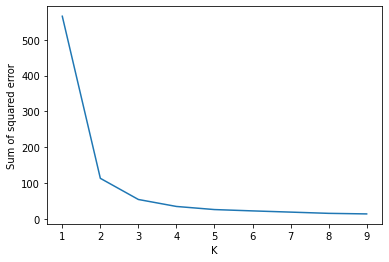

In [35]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [36]:
sse

[566.0320666666667,
 112.96262731481481,
 53.801351193126536,
 34.31442077922078,
 25.63146450956451,
 21.928506994572214,
 18.525046815985952,
 15.055941323169584,
 13.470050486476403]

## The best way to cluster these data points seemed to be k=3.  since we knew from the beginning that there are three kinds of iris. this fits well with the initial assumption